## Pre-processing Data and Data Visualization

**Load data from the excel file and perform pre-processing on the data:**

In [23]:
# Import necessary libraries
import pandas as pd
from math import *
import numpy as np
from copy import deepcopy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
# File names
file_name = "H-1B_Disclosure_Data_FY2019.xlsx"

# Read and store the data into an array
data = pd.read_excel(file_name)

# Print status
print ("Done loading the excel file")

Done loading the excel file


**Determine the number of H-1B visa applications and categories available in this dataset:**

In [3]:
# Display number of H-1B visa applicants
print ("{} H-1B visa applicants are provided in this dataset.".format(len(data)))

664616 H-1B visa applicants are provided in this dataset.


In [4]:
data_columns = data.columns

print ("There are a total of {} catergories in this dataset, which are: \n".format(len(data_columns)))

for i in range(len(data_columns)): print (str(i + 1) + " " + data_columns[i])

There are a total of 260 catergories in this dataset, which are: 

1 CASE_NUMBER
2 CASE_STATUS
3 CASE_SUBMITTED
4 DECISION_DATE
5 ORIGINAL_CERT_DATE
6 VISA_CLASS
7 JOB_TITLE
8 SOC_CODE
9 SOC_TITLE
10 FULL_TIME_POSITION
11 PERIOD_OF_EMPLOYMENT_START_DATE
12 PERIOD_OF_EMPLOYMENT_END_DATE
13 TOTAL_WORKER_POSITIONS
14 NEW_EMPLOYMENT
15 CONTINUED_EMPLOYMENT
16 CHANGE_PREVIOUS_EMPLOYMENT
17 NEW_CONCURRENT_EMPLOYMENT
18 CHANGE_EMPLOYER
19 AMENDED_PETITION
20 EMPLOYER_NAME
21 EMPLOYER_BUSINESS_DBA
22 EMPLOYER_ADDRESS1
23 EMPLOYER_ADDRESS2
24 EMPLOYER_CITY
25 EMPLOYER_STATE
26 EMPLOYER_POSTAL_CODE
27 EMPLOYER_COUNTRY
28 EMPLOYER_PROVINCE
29 EMPLOYER_PHONE
30 EMPLOYER_PHONE_EXT
31 NAICS_CODE
32 AGENT_REPRESENTING_EMPLOYER
33 AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME
34 AGENT_ATTORNEY_ADDRESS1
35 AGENT_ATTORNEY_ADDRESS2
36 AGENT_ATTORNEY_CITY
37 AGENT_ATTORNEY_STATE
38 AGENT_ATTORNEY_POSTAL_CODE
39 AGENT_ATTORNEY_COUNTRY
40 AGENT_ATTORNEY_PROVINCE
41 AGENT_ATTORNEY_PHONE
42 AGENT_ATTORNEY_PHONE_EXT
4

**There are 260 catergories in this dataset, and some of the categories are redundant to this project. For example, categories like *AGENT_REPRESENTING_EMPLOYER* and *NAME_OF_HIGHEST_STATE_COURT* are not likely to affect the final result stored in the *CASE_STATUS* column, and catergories like *SOC_CODE* and *SOC_TITLE* are relative to each other.** 

**As a result, in this project, we will primary focus on the following catergories:**

In [5]:
# focus = [3, 26, 27, 38, 41, 43, 47, 55, 108, 111, 113, 115, 125]
# focus = [3, 27, 38, 41, 43, 47, 55, 108, 111, 113, 115, 125]
focus = [2, 6, 7, 9, 10, 20, 52, 60, 258]

for i, ele in enumerate(focus):
    print (str(i + 1) + " " + data_columns[ele - 1])

print ("\nThere are {} focused catergories, in total.".format(len(focus)))

1 CASE_STATUS
2 VISA_CLASS
3 JOB_TITLE
4 SOC_TITLE
5 FULL_TIME_POSITION
6 EMPLOYER_NAME
7 WORKSITE_STATE_1
8 PW_WAGE_LEVEL_1
9 STATUTORY_BASIS

There are 9 focused catergories, in total.


**Data Visualization: Case Status**

Classes of the Case Status:  ['CERTIFIED' 'CERTIFIED-WITHDRAWN' 'DENIED' 'WITHDRAWN']
Percentage of Certified Applicants:  89.08948926899141  %
Percentage of Denied Applicants:  10.910510731008582  %
Number of Certified Applicants:  592103
Number of Denied Applicants:  72513


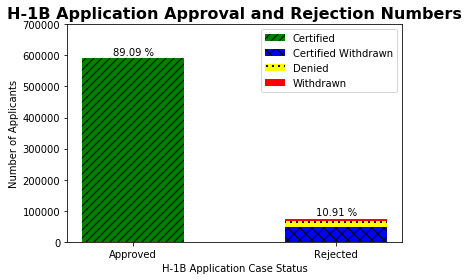

In [6]:
# Explore CASE_STATUS Column
# Deep copy the case status list
CASE_STATUS = deepcopy(list(data["CASE_STATUS"]))
# Convert to array
CASE_STATUS_array = np.array(CASE_STATUS)

# Determine the how many different classes in the Case Status Category
CASE_STATUS_classes = np.unique(CASE_STATUS_array)
print("Classes of the Case Status: ", CASE_STATUS_classes)

# Count how many applicants are denied and approved
case_dict = Counter(CASE_STATUS_array)

# Display how many applicants are certified, certified withdrawn, denied, and withdrawn.
#print(case_dict)
certified_Num = Counter(case_dict).most_common(len(Counter(case_dict)))[0][1]
certified_withdrawn_Num = Counter(case_dict).most_common(len(Counter(case_dict)))[1][1]
denied_Num = Counter(case_dict).most_common(len(Counter(case_dict)))[2][1]
withdrawn_Num = Counter(case_dict).most_common(len(Counter(case_dict)))[3][1]

# Turn multiple classes classification to a binary class classification
# Denied included DENIED, CERTIFIED-WITHDRAWN, WITHDRAWN
# Certified is CERTIFIED
case_dict = {"DENIED" : 0, "CERTIFIED" : 1, "CERTIFIED-WITHDRAWN" : 0, "WITHDRAWN" : 0}

# Determine the number of denied and certified
for i in range(len(CASE_STATUS)):
    
    case = CASE_STATUS[i]
    CASE_STATUS[i] = case_dict[case]

case = np.array(deepcopy(CASE_STATUS))

# Calculate the percentage of certified denied applicants
percent_certified = np.count_nonzero(case == 1) / len(case) * 100

# Calculate the percentage of denied denied applicants
percent_denied = np.count_nonzero(case == 0) / len(case) * 100

# Display results
print ("Percentage of Certified Applicants: ", percent_certified, " %")
print ("Percentage of Denied Applicants: ", percent_denied, " %")
print ("Number of Certified Applicants: ", np.count_nonzero(case == 1))
print ("Number of Denied Applicants: ", len(case) - np.count_nonzero(case == 1))


#### For Data Visualization
case_status_label = ["Approved", "Rejected"]
number_of_approved_applicants = np.array([certified_Num, 0])
number_of_certified_withdrawn_applicants = np.array([0, certified_withdrawn_Num])
number_of_denied_applicants = np.array([0, denied_Num])
number_of_withdrawn_applicants = np.array([0, withdrawn_Num])

# Plot bars in a stack method
fig, ax = plt.subplots()

ax.bar(case_status_label, number_of_approved_applicants, width=0.5, color = 'green', hatch='///')
ax.bar(case_status_label, number_of_certified_withdrawn_applicants, bottom = number_of_approved_applicants, width=0.5, color = 'blue', hatch='xx')
ax.bar(case_status_label, number_of_denied_applicants, bottom = number_of_approved_applicants + number_of_certified_withdrawn_applicants, width=0.5, color = 'yellow', hatch='..')
ax.bar(case_status_label, number_of_withdrawn_applicants, bottom = number_of_approved_applicants + number_of_certified_withdrawn_applicants + number_of_denied_applicants, width=0.5, color = 'red')
ax.set_xlabel("H-1B Application Case Status")
ax.set_ylabel("Number of Applicants")
ax.set_ylim([0, 700000])
ax.legend(["Certified", "Certified Withdrawn", "Denied", "Withdrawn"])

# Add labels to each bar.
for i, p in enumerate(ax.patches):
    
    if i == 0:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h + 20000)
        text = f'{percent_certified:0.2f} %'
        ax.annotate(s=text, xy=xy, ha='center', va='center')
        
    if i == 3:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h + 50000)
        text = f'{percent_denied:0.2f} %'
        ax.annotate(s=text, xy=xy, ha='center', va='center')
        
plt.title("H-1B Application Approval and Rejection Numbers", fontweight='bold', fontsize = 16)
plt.show()

**Data Visualization: Visa Class**

Classes of the Visa Class:  ['E-3 Australian' 'H-1B' 'H-1B1 Chile' 'H-1B1 Singapore']


Number of Applicants for each Visa Class:
Counter({'H-1B': 649083, 'E-3 Australian': 13087, 'H-1B1 Singapore': 1291, 'H-1B1 Chile': 1155})


Visa Class: [Rejected Count, Approved Count]
{'H-1B': [70443, 578640], 'H-1B1 Singapore': [170, 1121], 'H-1B1 Chile': [152, 1003], 'E-3 Australian': [1748, 11339]}
89.14730473606612 10.852695263933889
86.64323374340948 13.356766256590511
86.83982683982684 13.16017316017316
86.83191324554609 13.168086754453912


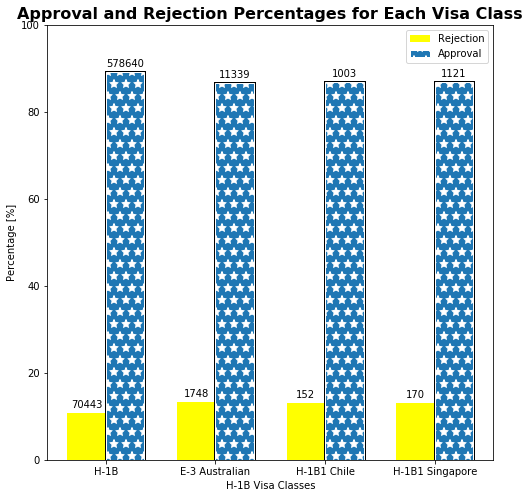

In [7]:
# Explore VISA_CLASS Column
# Deep copy the visa class list
VISA_CLASS = deepcopy(list(data["VISA_CLASS"]))

# Convert to array
VISA_CLASS_array = np.array(VISA_CLASS)

# Determine the how many different classes in the Visa Class Category
VISA_CLASS_classes = np.unique(VISA_CLASS_array)
print("Classes of the Visa Class: ", VISA_CLASS_classes)
print("\n")

# Count how many applicants are denied and approved
visa_dict = Counter(VISA_CLASS)
# Display how many applicants are H-1B, E-3 Australian, H-1B1 Singapore, and H-1B1 Chile.
print("Number of Applicants for each Visa Class:")
print(visa_dict)
print("\n")

# Create a visa dictionary that stores each visa class approved # and rejected #
# for example, {H-1B: [Rejected #, Approved#]
#               E-3 Australian: [Rejected #, Approved#]...}
visa_dict = {i: [0, 0] for i in set(VISA_CLASS)}
# Loop through the VISA_CLASS column to make sure there is no blank space in the list
for idx in range(0, len(VISA_CLASS)):
    
    # Extract visa type information
    visa_type = VISA_CLASS[idx]
    
    if type(visa_type) == str:
        
        # Update the VISA_CLASS
        VISA_CLASS[idx] = visa_type
        
    else:
        
        # if empty, it is a None type
        VISA_CLASS[idx] = None
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for each class.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the visa type and case status 
    visa_class, status = VISA_CLASS[idx], CASE_STATUS[idx]
    
    # Incement the count
    visa_dict[visa_class][status] += 1
    total_applicants += 1

# Display each visa class' rejected and approved counts
print("Visa Class: [Rejected Count, Approved Count]")
print(visa_dict)

# Define rejection and approved visa percentage list
rej, pas = [], []

# Total H-1B applicants
H_1B_tot_applicants = visa_dict["H-1B"][1] + visa_dict["H-1B"][0]
# H-1B approved percentage
H_1B_apr_perc = visa_dict["H-1B"][1] / H_1B_tot_applicants * 100
# H-1B rejected percentage
H_1B_rjt_perc = visa_dict["H-1B"][0] / H_1B_tot_applicants * 100
# Append to the list
rej.append(H_1B_rjt_perc)
pas.append(H_1B_apr_perc)

print(H_1B_apr_perc, H_1B_rjt_perc)

# Total E-3 applicants
E_3_tot_applicants = visa_dict["E-3 Australian"][1] + visa_dict["E-3 Australian"][0]
# E_3 approved percentage
E_3_apr_perc = visa_dict["E-3 Australian"][1] / E_3_tot_applicants * 100
# E_3 rejected percentage
E_3_rjt_perc = visa_dict["E-3 Australian"][0] / E_3_tot_applicants * 100
# Append to the list
rej.append(E_3_rjt_perc)
pas.append(E_3_apr_perc)

print(E_3_apr_perc, E_3_rjt_perc)

# Total H-1B1 Chile applicants
H_1B1_C_tot_applicants = visa_dict["H-1B1 Chile"][1] + visa_dict["H-1B1 Chile"][0]
# H-1B1 Chile approved percentage
H_1B1_C_apr_perc = visa_dict["H-1B1 Chile"][1] / H_1B1_C_tot_applicants * 100
# H-1B1 Chile rejected percentage
H_1B1_C_rjt_perc = visa_dict["H-1B1 Chile"][0] / H_1B1_C_tot_applicants * 100
# Append to the list
rej.append(H_1B1_C_rjt_perc)
pas.append(H_1B1_C_apr_perc)

print(H_1B1_C_apr_perc, H_1B1_C_rjt_perc)

# Total H-1B1 Singapore applicants
H_1B1_S_tot_applicants = visa_dict["H-1B1 Singapore"][1] + visa_dict["H-1B1 Singapore"][0]
# H-1B1 Singapore approved percentage
H_1B1_S_apr_perc = visa_dict["H-1B1 Singapore"][1] / H_1B1_S_tot_applicants * 100
# H-1B1 Singapore rejected percentage
H_1B1_S_rjt_perc = visa_dict["H-1B1 Singapore"][0] / H_1B1_S_tot_applicants * 100
# Append to the list
rej.append(H_1B1_S_rjt_perc)
pas.append(H_1B1_S_apr_perc)

print(H_1B1_S_apr_perc, H_1B1_S_rjt_perc)

# Visa class labels
visa_class_labels = ["H-1B", "E-3 Australian", "H-1B1 Chile", "H-1B1 Singapore"]

# Define rejection and approved visa numbers list
rej_Num, pas_Num = [], []

# Append the numbers to the list
for label in visa_class_labels:
    rej_Num.append(visa_dict[label][0])
    pas_Num.append(visa_dict[label][1])

# Combined into an array
rej_pas_Num_array = np.array([rej_Num,pas_Num])
rej_pas_Num_array = rej_pas_Num_array.T
# Flatten the array
rej_pas_Num_array = rej_pas_Num_array.flatten()
    
# Indices for each visa class
ind = np.arange(len(visa_class_labels))

# Plot bars
fig, ax = plt.subplots(figsize = (8, 8))

# Set Bar Graph width
bar_width = 0.35

# Plot the bar graph
ax.bar(ind, rej, bar_width, label = "Rejection", color = 'yellow', zorder = 0)
ax.bar(ind + bar_width, pas, bar_width, label = "Approval", hatch = '*', fill = "white", edgecolor = 'white', zorder = 2, lw = 1)
ax.set_title("Approval and Rejection Percentages for Each Visa Class", fontweight='bold', fontsize = 16)
ax.set_ylabel("Percentage [%]")
ax.set_xlabel("H-1B Visa Classes")
ax.set_ylim([0, 100])
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(visa_class_labels)
ax.legend(loc = "best")

# Annotate the number of applicant for each class and case status bar
for i, p in enumerate(ax.patches):
    
    # If index is less than 3
    if i <= 3:
            
        height = p.get_height()
        ax.annotate('{}'.format(rej_pas_Num_array[i*2]),
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # If more than 3
    else:
        
        height = p.get_height()
        ax.annotate('{}'.format(rej_pas_Num_array[i - (len(rej_pas_Num_array) - 1 - i)]),
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Draw black edge for the approved bar
ax.bar(ind + bar_width, pas, bar_width, edgecolor = 'black', zorder = 1, lw = 3)
        
plt.show()




**Data Visualization: Worksite State**

In [8]:
# WORKSITE_STATE
# Explore VISA_CLASS Column
# Deep copy the visa class list
WORKSITE_STATE_1 = deepcopy(list(data["WORKSITE_STATE_1"]))

# Convert to array
WORKSITE_STATE_1_array = np.array(WORKSITE_STATE_1)

# Loop through the WORKSITE_STATE_1 column to make sure there is no blank space in the list
for idx in range(0, len(WORKSITE_STATE_1)):
    
    # Extract work state information
    work_state = WORKSITE_STATE_1[idx]
    
    if type(work_state) == str:
        
        # Update the WORKSITE_STATE_1
        WORKSITE_STATE_1[idx] = work_state
        
    else:
        
        # if empty, it is a None type
        WORKSITE_STATE_1[idx] = "OTHERS"

# Determine the how many different states in the WORKSITE_STATE_1 column
WORKSITE_states = np.unique(WORKSITE_STATE_1_array)
print("Worksite States :\n\n", WORKSITE_states)
print("\n")

states_dict = {"OTHERS" : 0, 
               "ALABAMA" : 1, "AL" : 1,
               "ALASKA" : 2, "AK" : 2,
               "ARIZONA" : 3, "AZ" : 3,
               "ARKANSAS" : 4, "AR" : 4,
               "CALIFORNIA" : 5, "CA" : 5,
               "COLORADO" : 6, "CO" : 6,
               "CONNECTICUT" : 7, "CT" : 7,
               "DELAWARE" : 8, "DE" : 8,
               "DISTRICT OF COLUMBIA": 9, "DC": 9,
               "FLORIDA" : 10, "FL": 10,
               "GEORGIA" : 11, "GA": 11,
               "GUAM": 12, "GU": 12,
               "HAWAII" : 13, "HI" : 13,
               "IDAHO": 14, "ID" : 14,
               "ILLINOIS": 15, "IL": 15,
               "INDIANA": 16, "IN" : 16,
               "IOWA": 17, "IA" : 17,
               "KANSAS": 18, "KS": 18,
               "KENTUCKY": 19, "KY": 19,
               "LOUISIANA": 20, "LA": 20,
               "MAINE": 21, "ME" : 21,
               "MARYLAND": 22, "MD": 22,
               "MASSACHUSETTS": 23, "MA": 23,
               "MICHIGAN": 24, "MI": 24,
               "MINNESOTA": 25, "MN": 25,
               "MISSISSIPPI": 26, "MS": 26,
               "MISSOURI": 27, "MO": 27,
               "MONTANA": 28, "MT": 28,
               "NEBRASKA": 29, "NE": 29,
               "NEVADA": 30, "NV": 30,
               "NEW HAMPSHIRE": 31, "NH": 31,
               "NEW JERSEY": 32, "NJ": 32,
               "NEW MEXICO": 33, "NM": 33,
               "NEW YORK": 34, "NY": 34,
               "NORTH CAROLINA": 35, "NC": 35,
               "NORTH DAKOTA": 36, "ND": 36,
               "NORTHERN MARIANA ISLANDS": 37, "MP": 37,
               "OHIO": 38, "OH": 38,
               "OKLAHOMA": 39, "OK": 39,
               "OREGON": 40, "OR": 40,
               "PENNSYLVANIA": 41, "PA": 41,
               "PUERTO RICO": 42, "PR": 42,
               "RHODE ISLAND": 43, "RI": 43,
               "SOUTH CAROLINA": 44, "SC": 44,
               "SOUTH DAKOTA": 45, "SD": 45,
               "TENNESSEE": 46, "TN": 46,
               "TEXAS": 47, "TX": 47,
               "UTAH": 48, "UT": 48,
               "VERMONT": 49, "VT": 49,
               "VIRGINIA": 50, "VA": 50,
               "VIRGIN ISLANDS": 51, "VI": 51,
               "WASHINGTON": 52, "WA": 52,
               "WEST VIRGINIA": 53, "WV": 53,
               "WISCONSIN": 54, "WI":54,
               "WYOMING": 55, "WY": 55,
               "PALAU": 56, "PW": 56,
               "MARSHALL ISLANDS": 57}


# Determine the number of denied and certified
for i in range(len(WORKSITE_STATE_1)):
    
    # Get state (string)
    state = WORKSITE_STATE_1[i]
    # Output state id
    WORKSITE_STATE_1[i] = states_dict[state]
        
    # Convert to state in string or None
    WORKSITE_STATE_1[i] = list(states_dict.keys())[list(states_dict.values()).index(WORKSITE_STATE_1[i])]

# Count how many applicants are there for different worksite states
new_states_dict = Counter(WORKSITE_STATE_1)
# Display how many applicants are H-1B, E-3 Australian, H-1B1 Singapore, and H-1B1 Chile.
print("Number of Applicants in Different Worksite States:\n\n")
print(new_states_dict)
print("\n")

# Determine the how many different states in the WORKSITE_STATE_1
#U_States = np.unique(u_states_array)
print("Different Worksite States:\n\n", new_states_dict.keys())
print("\n")

# Convert to dataframe
df_states = pd.DataFrame(list(new_states_dict.items()))
df_states.columns = ['Worksite States', 'Number of H-1B Applicants']
#print(df_states)

fig = px.treemap(df_states, path=['Worksite States'], 
                  values='Number of H-1B Applicants',
                  color='Number of H-1B Applicants',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


Worksite States :

 ['AK' 'AL' 'ALABAMA' 'ALASKA' 'AR' 'ARIZONA' 'ARKANSAS' 'AZ' 'CA'
 'CALIFORNIA' 'CO' 'COLORADO' 'CONNECTICUT' 'CT' 'DC' 'DE' 'DELAWARE'
 'DISTRICT OF COLUMBIA' 'FL' 'FLORIDA' 'GA' 'GEORGIA' 'GU' 'GUAM' 'HAWAII'
 'HI' 'IA' 'ID' 'IDAHO' 'IL' 'ILLINOIS' 'IN' 'INDIANA' 'IOWA' 'KANSAS'
 'KENTUCKY' 'KS' 'KY' 'LA' 'LOUISIANA' 'MA' 'MAINE' 'MARSHALL ISLANDS'
 'MARYLAND' 'MASSACHUSETTS' 'MD' 'ME' 'MI' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MN' 'MO' 'MONTANA' 'MP' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO'
 'NEW YORK' 'NH' 'NJ' 'NM' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'NORTHERN MARIANA ISLANDS' 'NV' 'NY' 'OH' 'OHIO' 'OK' 'OKLAHOMA' 'OR'
 'OREGON' 'PA' 'PALAU' 'PENNSYLVANIA' 'PR' 'PUERTO RICO' 'PW'
 'RHODE ISLAND' 'RI' 'SC' 'SD' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE'
 'TEXAS' 'TN' 'TX' 'UT' 'UTAH' 'VA' 'VERMONT' 'VI' 'VIRGIN ISLANDS'
 'VIRGINIA' 'VT' 'WA' 'WASHINGTON' 'WEST VIRGINIA' 'WI' 'WISCONSIN' 'WV'
 'WY' 'WYOMING

In [9]:
# Create a state count dictionary that stores each states approved # and rejected #
# for example, {California: [Rejected #, Approved#, Total # of Applicant in the State, Percentage of Approved]
#               Ohio: [Rejected #, Approved#]...}
state_count_dict = {i: [0, 0, 0, 0.0] for i in set(WORKSITE_STATE_1)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for each worksite state.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the work state and case status 
    wrk_state, c_status = WORKSITE_STATE_1[idx], CASE_STATUS[idx]
    
    # Incement the count
    state_count_dict[wrk_state][c_status] += 1
    state_count_dict[wrk_state][2] += 1
    state_count_dict[wrk_state][3] = state_count_dict[wrk_state][1] / state_count_dict[wrk_state][2] * 100
    
    total_applicants += 1

# Display each worksite state rejected and approved counts, total applicants in the state, and approved percentage
print("Worksite State: [Rejected Count, Approved Count, Total H-1B Applicants in the State, Certified H-1B Visas Percentage]:\n")
print(state_count_dict)

# Convert to dataframe
df_states_count = pd.DataFrame.from_dict(state_count_dict, orient='index')
df_states_count.columns = ['Number of Denied H-1B Visas', 'Number of Certified H-1B Visas', 'Total H-1B Applicants in the State', 'Certified H-1B Visas Percentage [%]']
#print(df_states_count)

Worksite State: [Rejected Count, Approved Count, Total H-1B Applicants in the State, Certified H-1B Visas Percentage]:

{'GEORGIA': [2353, 20297, 22650, 89.61147902869757], 'DISTRICT OF COLUMBIA': [506, 3714, 4220, 88.00947867298578], 'GUAM': [25, 330, 355, 92.95774647887323], 'TEXAS': [7253, 59465, 66718, 89.12887076950749], 'KENTUCKY': [220, 2663, 2883, 92.36906000693722], 'NORTH CAROLINA': [2003, 19307, 21310, 90.60065696855936], 'ARKANSAS': [338, 4018, 4356, 92.24058769513314], 'TENNESSEE': [823, 6497, 7320, 88.7568306010929], 'MAINE': [45, 484, 529, 91.49338374291115], 'MICHIGAN': [3166, 18015, 21181, 85.05264151834191], 'MONTANA': [34, 155, 189, 82.01058201058201], 'MISSOURI': [1149, 8236, 9385, 87.75705913692062], 'NORTH DAKOTA': [54, 379, 433, 87.52886836027713], 'ALABAMA': [281, 1713, 1994, 85.90772316950851], 'VIRGIN ISLANDS': [10, 40, 50, 80.0], 'NEVADA': [183, 1551, 1734, 89.44636678200692], 'OREGON': [655, 4608, 5263, 87.55462663879916], 'ALASKA': [36, 136, 172, 79.0697674

In [10]:
# Display Certified H-1B Visas Percentage in Different Worksite States Treemap
fig = px.treemap(df_states_count, path=[df_states_count.index], 
                  values='Certified H-1B Visas Percentage [%]',
                  color='Certified H-1B Visas Percentage [%]',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [11]:
# Display Number of Certified H-1B Visas in Different Worksite States Treemap
fig = px.treemap(df_states_count, path=[df_states_count.index], 
                  values='Number of Certified H-1B Visas',
                  color='Number of Certified H-1B Visas',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [12]:
# Display Number of Denied H-1B Visas in Different Worksite States Treemap
df_states_count = df_states_count[df_states_count['Number of Denied H-1B Visas']!=0]
fig = px.treemap(df_states_count, path=[df_states_count.index], 
                  values='Number of Denied H-1B Visas',
                  color='Number of Denied H-1B Visas',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Data Visualization: Employer Name**

Number of Applicants for each Employer:
[('COGNIZANT TECHNOLOGY SOLUTIONS US CORP', 28475), ('INFOSYS LIMITED', 21448), ('TATA CONSULTANCY SERVICES LIMITED', 11868), ('GOOGLE LLC', 10009), ('ERNST & YOUNG U.S. LLP', 8801), ('CAPGEMINI AMERICA INC', 7878), ('DELOITTE CONSULTING LLP', 7793), ('AMAZON.COM SERVICES, INC.', 7267), ('MICROSOFT CORPORATION', 6040), ('ACCENTURE LLP', 5653), ('IBM CORPORATION', 5057), ('HCL AMERICA, INC.', 4688), ('WIPRO LIMITED', 4291), ('LARSEN & TOUBRO INFOTECH LIMITED', 3624), ('TECH MAHINDRA (AMERICAS),INC.', 2915), ('FACEBOOK, INC.', 2680), ('WAL-MART ASSOCIATES, INC.', 2277), ('IBM INDIA PRIVATE LIMITED', 2171), ('L&T TECHNOLOGY SERVICES LIMITED', 2034), ('SYNTEL INC', 1888), ('JPMORGAN CHASE & CO.', 1786), ('APPLE INC.', 1708), ('INTEL CORPORATION', 1683), ('COMPUNNEL SOFTWARE GROUP, INC.', 1666), ('RANDSTAD TECHNOLOGIES, LLC', 1579), ('AMAZON WEB SERVICES, INC.', 1547), ('PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC', 1452), ('MPHASIS CORPORATION', 140

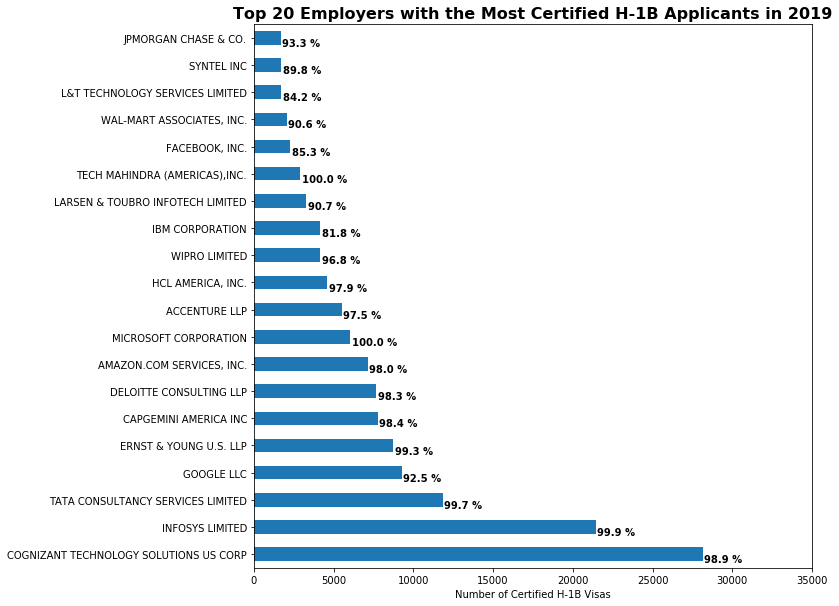

In [13]:
# Explore EMPLOYER_NAME Column
# Deep copy the EMPLOYER_NAME list
EMPLOYER_NAME = deepcopy(list(data["EMPLOYER_NAME"]))

# Loop through the EMPLOYER_NAME column to make sure there is no blank space in the list
for idx in range(0, len(EMPLOYER_NAME)):
    
    # Extract employer name information
    employer_name = EMPLOYER_NAME[idx]
    
    if type(employer_name) == str:
        
        # Update the EMPLOYER_NAME
        EMPLOYER_NAME[idx] = employer_name
        
    else:
        
        # if empty, it is a None type
        EMPLOYER_NAME[idx] = "OTHERS"


# Count how many applicants are there in different employers
employer_names_dict = Counter(EMPLOYER_NAME).most_common(100)[:][:]
print("Number of Applicants for each Employer:")
print(employer_names_dict)
print("\n")


# Create a employer name count dictionary that stores approved # and rejected #
# for example, {Tesla: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]
#               Apple: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]...}
employer_names_count_dict = {i: [0, 0, 0, 0.0] for i in set(EMPLOYER_NAME)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for each employer name.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the employer name and case status 
    emplyr_nm, c_status = EMPLOYER_NAME[idx], CASE_STATUS[idx]
    
    # Incement the count
    employer_names_count_dict[emplyr_nm][c_status] += 1
    employer_names_count_dict[emplyr_nm][2] += 1
    employer_names_count_dict[emplyr_nm][3] = employer_names_count_dict[emplyr_nm][1] / employer_names_count_dict[emplyr_nm][2] * 100
    
    total_applicants += 1

# Convert to dataframe
df_employer_names_count = pd.DataFrame.from_dict(employer_names_count_dict, orient='index')
df_employer_names_count.columns = ['Number of Denied H-1B Visas', 'Number of Certified H-1B Visas', 'Total H-1B Applicants in the State', 'Certified H-1B Visas Percentage [%]']

# Sorted dataframe from largest to smallest
sorted_df = df_employer_names_count['Number of Certified H-1B Visas'].sort_values(ascending=False)
emplyr_cert_perc = df_employer_names_count.loc[sorted_df.index[:]]['Certified H-1B Visas Percentage [%]']

# Plot horizontal bar
plt.figure(figsize=(10,10))
ax1 = df_employer_names_count['Number of Certified H-1B Visas'].sort_values(ascending=False).head(20).plot(kind='barh')
ax1.set_ylabel("")
ax1.set_title('Top 20 Employers with the Most Certified H-1B Applicants in 2019', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 35000])
ax1.set_xlabel("Number of Certified H-1B Visas")

# Annotate the horizontal bar with Certified H-1B Visas Percentage [%]
for i, num_cert in enumerate(sorted_df[:20]):

    ax1.text(num_cert + 100, i - 0.3, f'{emplyr_cert_perc[i]:0.1f} %', color='black', fontweight='bold')
    
plt.show()



**Data Visualization: Full Time Position**

Full-position Statistics:
Counter({'Y': 653376, 'N': 11240})


Full-time Position Status [Y/N] : [Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]
{'Y': [71142, 582234, 653376, 89.1116294446077], 'N': [1371, 9869, 11240, 87.80249110320285]}


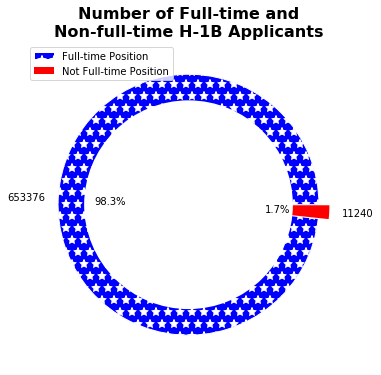

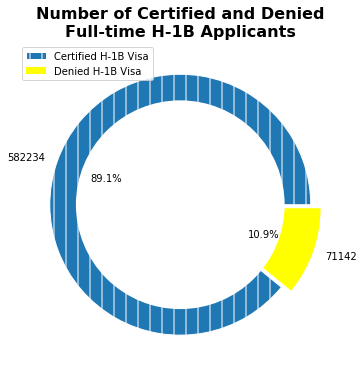

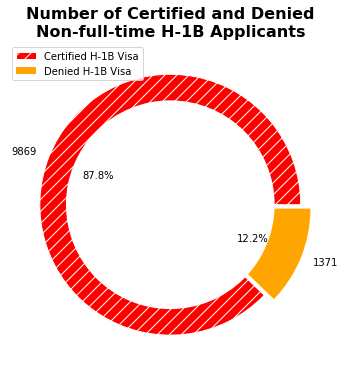

In [14]:
# Explore FULL_TIME_POSITION Column
# Deep copy the FULL_TIME_POSITION list
FULL_TIME_POSITION = deepcopy(list(data["FULL_TIME_POSITION"]))

# Loop through the FULL_TIME_POSITION column to make sure there is no blank space in the list
for idx in range(0, len(FULL_TIME_POSITION)):
    
    # Extract full time position information
    full_time_pst = FULL_TIME_POSITION[idx]
    
    if type(full_time_pst) == str:
        
        # Update the FULL_TIME_POSITION
        FULL_TIME_POSITION[idx] = full_time_pst
        
    else:
        
        # if empty, it is a N/A
        FULL_TIME_POSITION[idx] = "N/A"


# Count how many applicants are full time
full_time_pst_dict = Counter(FULL_TIME_POSITION)
print("Full-position Statistics:")
print(full_time_pst_dict)
print("\n")

# Create a full-time position count dictionary that stores approved # and rejected #
# for example, {"Y": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]
#               "N": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]}
full_time_pst_dict = {i: [0, 0, 0, 0.0] for i in set(FULL_TIME_POSITION)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for full-time and not full-time positions.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the full-time position info and case status 
    ft_pst, c_status = FULL_TIME_POSITION[idx], CASE_STATUS[idx]
    
    # Incement the count
    full_time_pst_dict[ft_pst][c_status] += 1
    full_time_pst_dict[ft_pst][2] += 1
    full_time_pst_dict[ft_pst][3] = full_time_pst_dict[ft_pst][1] / full_time_pst_dict[ft_pst][2] * 100
    
    total_applicants += 1

# {'Full-time position':[Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]
# 'Not Full-time position':[Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]}
print("Full-time Position Status [Y/N] : [Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]")
print(full_time_pst_dict)

# List that store total number of full-time H-1B and non-full-time H-1B applicants
# [Certified Full time #, Denied Full time #, Certified non-Full time #, Denied non-Full time #]
tot_ft_pt = [full_time_pst_dict["Y"][2], full_time_pst_dict["N"][2]]
tot_ft_pt_labels = [str(full_time_pst_dict["Y"][2]), str(full_time_pst_dict["N"][2])]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ["blue", "red"]

# Explosion Donut Chart Parameters
explode = (0.00, 0.08)

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart1 = plt.pie(tot_ft_pt, colors = colors, labels = tot_ft_pt_labels, autopct = '%1.1f%%', explode=explode)
pie_chart1[0][0].set_hatch("*")
pie_chart1[0][0].set_edgecolor("white")

# Draw a circle at the center of the pie chart
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Number of Full-time and\nNon-full-time H-1B Applicants', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["Full-time Position", "Not Full-time Position"], loc="upper left")
  
# Displaing Chart
plt.show()

# List that store total number of full-time certified H-1B and full-time denied H-1B applicants
# [Full time Certified # Full time Denied #]
cert_rjt_ft = [full_time_pst_dict["Y"][1], full_time_pst_dict["Y"][0]]
cert_rjt_ft_labels = [str(full_time_pst_dict["Y"][1]), str(full_time_pst_dict["Y"][0])]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ['#1f77b4', "yellow"]

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart2 = plt.pie(cert_rjt_ft, colors = colors, labels = cert_rjt_ft_labels, autopct = '%1.1f%%', explode=explode)
pie_chart2[0][0].set_hatch("|")
pie_chart2[0][0].set_edgecolor("white")

# Draw a circle at the center of the pie chart
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Number of Certified and Denied\nFull-time H-1B Applicants', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["Certified H-1B Visa", "Denied H-1B Visa"], loc="upper left")
  
# Displaing Chart
plt.show()

# List that store total number of non full-time certified H-1B and non full-time denied H-1B applicants
# [non-Full time Certified # non-Full time Denied #]
cert_rjt_nft = [full_time_pst_dict["N"][1], full_time_pst_dict["N"][0]]
cert_rjt_nft_labels = [str(full_time_pst_dict["N"][1]), str(full_time_pst_dict["N"][0])]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ['red', "orange"]

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart3 = plt.pie(cert_rjt_nft, colors = colors, labels = cert_rjt_nft_labels, autopct = '%1.1f%%', explode=explode)
pie_chart3[0][0].set_hatch("//")
pie_chart3[0][0].set_edgecolor("white")

# Draw a circle at the center of the pie chart
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Number of Certified and Denied\nNon-full-time H-1B Applicants', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["Certified H-1B Visa", "Denied H-1B Visa"], loc="upper left")
  
# Displaing Chart
plt.show()


**Data Visualization: Prevailing Wage Level**

Prevailing Wage Level Information:
Counter({'Level II': 320990, 'Level III': 118271, 'Level I': 91913, 'Level IV': 69395, 'Not Specified': 64047})


Prevailing Wage Levels: [Rejected #, Certified #, Total #, Percentage of Certified, Percentage of Denied]
{'Level I': [8248, 83665, 91913, 91.02629660657361, 8.973703393426392], 'Level II': [19822, 301168, 320990, 93.82472974235958, 6.175270257640425], 'Not Specified': [32630, 31417, 64047, 49.053039174356336, 50.94696082564367], 'Level III': [7135, 111136, 118271, 93.96724471764, 6.032755282360004], 'Level IV': [4678, 64717, 69395, 93.25888032278982, 6.741119677210174]}
32630


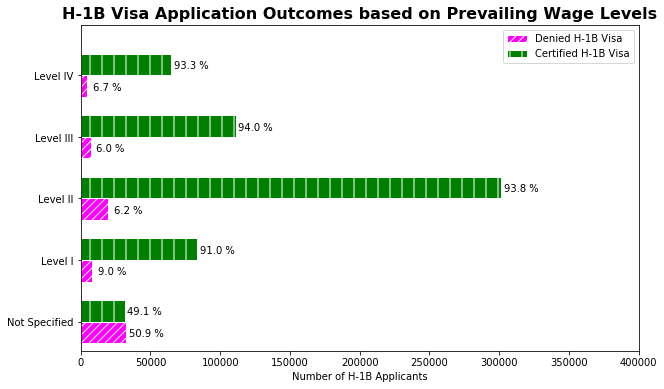

In [15]:
# Explore PW_WAGE_LEVEL_1 Column
# Deep copy the PW_WAGE_LEVEL_1 list
PW_WAGE_LEVEL_1 = deepcopy(list(data["PW_WAGE_LEVEL_1"]))

# Loop through the PW_WAGE_LEVEL_1 column to make sure there is no blank space in the list
for idx in range(0, len(PW_WAGE_LEVEL_1)):
    
    # Extract Prevailing Wage Level information
    pw_level = PW_WAGE_LEVEL_1[idx]
    
    if type(pw_level) == str:
        
        # Update the PW_WAGE_LEVEL_1
        PW_WAGE_LEVEL_1[idx] = pw_level
        
    else:
        
        # if empty, it is a N/A
        PW_WAGE_LEVEL_1[idx] = "Not Specified"

# Count how many applicants are there in different prevailing wage level
# H-1B Wage Level 1 (Entry) : $38k to $51k annual salary
# H-1B Wage Level 2 (Qualified) : $51k to $65k salary
# H-1B Wage Level 3 (Experienced): $65k to $75k salary
# H-1B Wage Level 4 (Fully Competent): $78k to $90k salary
# Source: https://www.yeklaw.com/blog/2021/april/what-are-the-wage-levels-for-h1-b-visa-workers-/
pw_level_dict = Counter(PW_WAGE_LEVEL_1)
print("Prevailing Wage Level Information:")
print(pw_level_dict)
print("\n")

# Create a prevailing wage level count dictionary that stores approved # and rejected #
# for example, {"Level I": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved, Percentage of Denied]
#               "Level II": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved, Percentage of Denied]}
pw_level_count_dict = {i: [0, 0, 0, 0.0, 0.0] for i in set(PW_WAGE_LEVEL_1)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for different prevailing wage levels.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the prevailing wage level info and case status 
    pw_lvl, c_status = PW_WAGE_LEVEL_1[idx], CASE_STATUS[idx]
    
    # Incement the count
    pw_level_count_dict[pw_lvl][c_status] += 1
    pw_level_count_dict[pw_lvl][2] += 1
    pw_level_count_dict[pw_lvl][3] = pw_level_count_dict[pw_lvl][1] / pw_level_count_dict[pw_lvl][2] * 100
    pw_level_count_dict[pw_lvl][4] = pw_level_count_dict[pw_lvl][0] / pw_level_count_dict[pw_lvl][2] * 100
    
    total_applicants += 1
    
# Print dictionary
print("Prevailing Wage Levels: [Rejected #, Certified #, Total #, Percentage of Certified, Percentage of Denied]")
print(pw_level_count_dict)
print(pw_level_count_dict["Not Specified"][0])

# Prevailing Wage(PW) Level Labels
pw_level_labels = ["Not Specified", "Level I", "Level II", "Level III", "Level IV"]
rej_num, pas_num, tot_num, pas_perc, rej_perc= [], [], [], [], []

# Append to list
for label in pw_level_labels:
    
    rej_num.append(pw_level_count_dict[label][0])
    pas_num.append(pw_level_count_dict[label][1])
    tot_num.append(pw_level_count_dict[label][2])
    pas_perc.append(pw_level_count_dict[label][3])
    rej_perc.append(pw_level_count_dict[label][4])

# Horizontal bar plot parameters
ind = np.arange(len(pw_level_labels))
width = 0.35

# Plot horizontal Bar
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(ind, rej_num, width, color='magenta', label='Denied H-1B Visa', hatch ='///', edgecolor = "white")
ax.barh(ind + width, pas_num, width, color='green', label='Certified H-1B Visa', hatch ='|', edgecolor = "white")
ax.set_title("H-1B Visa Application Outcomes based on Prevailing Wage Levels", fontweight='bold', fontsize = 16)
ax.set_xlim([0, 400000])
ax.set_xlabel("Number of H-1B Applicants")
ax.set(yticks= ind + width / 2, yticklabels=pw_level_labels, ylim=[2*width - 1, len(pw_level_labels)])
ax.legend()

# Combined into an array
rej_pas_Perc_array = np.array([rej_perc, pas_perc])
rej_pas_Perc_array = rej_pas_Perc_array.T
# Flatten the array
rej_pas_Perc_array = rej_pas_Perc_array.flatten()

# Annotate the horizontal bar with Certified and Denied H-1B Visas Percentage [%]
for i, p in enumerate(ax.patches):
    
    # If index is less than 4
    if i <= 4:
            
        width = p.get_width()
        ax.annotate(f'{rej_pas_Perc_array[i*2]:0.1f} %',
                    xy=(width, p.get_y() + p.get_height() / 2),
                    xytext=(20, -6),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # If more than 4
    else:
        
        width = p.get_width()
        ax.annotate(f'{rej_pas_Perc_array[i - (len(rej_pas_Perc_array) - 1 - i)]:0.1f} %',
                    xy=(width, p.get_y() + p.get_height() / 2),
                    xytext=(20, -6),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='center', va='bottom')


**Data Visualization: Statutory Basis**

Statutory Basis Statistics:
Counter({'N/A': 456626, 'WAGE': 152271, 'BOTH': 54427, 'DEGREE': 1292})


Advanced Degrees:
Counter({'N': 608897, 'Y': 55719})


Advanced Degree [Y/N] : [Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]
{'Y': [4720, 50999, 55719, 91.52892191173567], 'N': [67793, 541104, 608897, 88.86626145308648]}


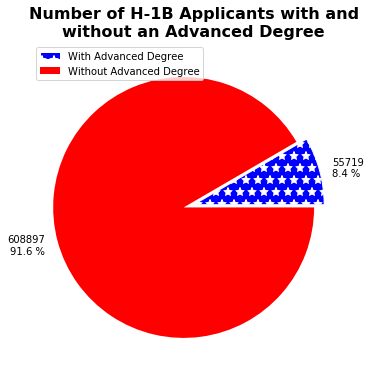

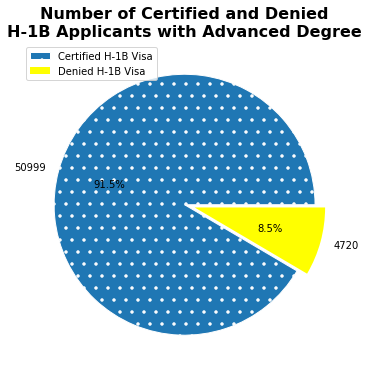

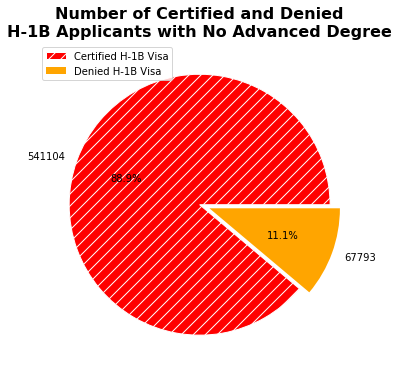

In [16]:
# Explore STATUTORY_BASIS Column
# Deep copy the STATUTORY_BASIS list
STATUTORY_BASIS = deepcopy(list(data["STATUTORY_BASIS"]))

# Loop through the STATUTORY_BASIS column to make sure there is no blank space in the list
for idx in range(0, len(STATUTORY_BASIS)):
    
    # Extract statutory basis information
    stb = STATUTORY_BASIS[idx]
    
    if type(stb) == str:
        
        # Update the STATUTORY_BASIS
        STATUTORY_BASIS[idx] = stb
        
    else:
        
        # if empty, it is a N/A
        STATUTORY_BASIS[idx] = "N/A"
        
# Count how many applicants have an advanced degree
stb_dict = Counter(STATUTORY_BASIS)
print("Statutory Basis Statistics:")
print(stb_dict)
print("\n")

# Convert it to whether it has advanced degree or no advanced degree like masters and PhDs
for idx in range(0, len(STATUTORY_BASIS)):
    
    # Extract statutory basis information
    stb = STATUTORY_BASIS[idx]
    
    if stb == "BOTH" or  stb == "DEGREE":
        
        # Update the STATUTORY_BASIS
        STATUTORY_BASIS[idx] = "Y"
        
    else:
        
        # if empty, it is a N/A
        STATUTORY_BASIS[idx] = "N"

# Count how many applicants have an advanced degree
new_stb_dict = Counter(STATUTORY_BASIS)
print("Advanced Degrees:")
print(new_stb_dict)
print("\n")


# Create a advanced degree count dictionary that stores approved # and rejected #
# for example, {"Y": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]
#               "N": [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]}
new_stb_dict = {i: [0, 0, 0, 0.0] for i in set(STATUTORY_BASIS)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for full-time and not full-time positions.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the advanced degree and case status 
    adv_deg, c_status = STATUTORY_BASIS[idx], CASE_STATUS[idx]
    
    # Incement the count
    new_stb_dict[adv_deg][c_status] += 1
    new_stb_dict[adv_deg][2] += 1
    new_stb_dict[adv_deg][3] = new_stb_dict[adv_deg][1] / new_stb_dict[adv_deg][2] * 100
    
    total_applicants += 1

# {'Advanced Degree':[Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]
# 'No Advanced Degre':[Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]}
print("Advanced Degree [Y/N] : [Rejected #, Certified #, Total #, Percentage of Certified H-1B applications]")
print(new_stb_dict)

# List that store total number of H-1B applicants with advanced degree
# [Advanced Degree #, No Advanced Degree #]
tot_adv_deg = [new_stb_dict["Y"][2], new_stb_dict["N"][2]]
tot_adv_deg_labels = [str(new_stb_dict["Y"][2]) + "\n" + str(round(new_stb_dict["Y"][2]/(new_stb_dict["Y"][2] + new_stb_dict["N"][2])*100, 1)) + " %", 
                      str(new_stb_dict["N"][2]) + "\n" + str(round(new_stb_dict["N"][2]/(new_stb_dict["Y"][2] + new_stb_dict["N"][2])*100, 1)) + " %"]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ["blue", "red"]

# Explosion Donut Chart Parameters
explode = (0.00, 0.08)

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart1 = plt.pie(tot_adv_deg, colors = colors, labels = tot_adv_deg_labels, explode=explode)
pie_chart1[0][0].set_hatch("*")
pie_chart1[0][0].set_edgecolor("white")
  
# Adding Title of chart
plt.title('Number of H-1B Applicants with and\nwithout an Advanced Degree', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["With Advanced Degree", "Without Advanced Degree"], loc="upper left")
  
# Displaing Chart
plt.show()

# List that store total number of advanced degree certified H-1B and no advanced degree denied H-1B applicants
# [Advanced Degree Certified # Advanced Degree Denied #]
cert_rjt_adv_deg = [new_stb_dict["Y"][1], new_stb_dict["Y"][0]]
cert_rjt_adv_deg_labels = [str(new_stb_dict["Y"][1]), str(new_stb_dict["Y"][0])]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ['#1f77b4', "yellow"]

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart2 = plt.pie(cert_rjt_adv_deg, colors = colors, labels = cert_rjt_adv_deg_labels, autopct = '%1.1f%%', explode=explode)
pie_chart2[0][0].set_hatch(".")
pie_chart2[0][0].set_edgecolor("white")
  
# Adding Title of chart
plt.title('Number of Certified and Denied\nH-1B Applicants with Advanced Degree', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["Certified H-1B Visa", "Denied H-1B Visa"], loc="upper left")
  
# Displaing Chart
plt.show()

# List that store total number of certified and denied H-1B applicants with no advanced degree
# [No Advanced Degree Certified #, No Advanced Degree Denied #]
cert_rjt_no_adv_deg = [new_stb_dict["N"][1], new_stb_dict["N"][0]]
cert_rjt_no_adv_deg_labels = [str(new_stb_dict["N"][1]), str(new_stb_dict["N"][0])]

# Donut Colors
#colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
colors = ['red', "orange"]

# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
pie_chart3 = plt.pie(cert_rjt_no_adv_deg, colors = colors, labels = cert_rjt_no_adv_deg_labels, autopct = '%1.1f%%', explode=explode)
pie_chart3[0][0].set_hatch("//")
pie_chart3[0][0].set_edgecolor("white")
  
# Adding Title of chart
plt.title('Number of Certified and Denied\nH-1B Applicants with No Advanced Degree', fontweight='bold', fontsize = 16)
  
# Add Legends
plt.legend(["Certified H-1B Visa", "Denied H-1B Visa"], loc="upper left")
  
# Displaing Chart
plt.show()

**Data Visualization: Job Title**

Number of Applicants for each Job Title:
[('SOFTWARE ENGINEER', 34691), ('SOFTWARE DEVELOPER', 34366), ('SENIOR SYSTEMS ANALYST JC60', 12897), ('SENIOR SOFTWARE ENGINEER', 8482), ('MANAGER JC50', 8205), ('TECHNOLOGY LEAD - US - PRACTITIONER', 7434), ('ASSISTANT PROFESSOR', 5632), ('PROGRAMMER ANALYST', 4983), ('JAVA DEVELOPER', 4062), ('SENIOR SOFTWARE DEVELOPER', 3800), ('BUSINESS ANALYST', 3754), ('ANALYST', 3724), ('DEVELOPER', 3580), ('ARCHITECT', 3540), ('COMPUTER SYSTEMS ANALYSTS', 3518), ('ASSOCIATE', 3335), ('CONSULTANT', 2975), ('SYSTEM ANALYST JC65', 2956), ('APPLICATION DEVELOPER', 2944), ('TECHNOLOGY LEAD - US', 2888), ('PROJECT MANAGER', 2771), ('DATA SCIENTIST', 2701), ('SENIOR CONSULTANT', 2670), ('SOFTWARE DEVELOPMENT ENGINEER II', 2572), ('DATABASE ADMINISTRATOR', 2466), ('SYSTEMS ANALYST', 2306), ('ACCOUNTANTS AND AUDITORS', 2193), ('APPLICATIONS CONSULTANT 2', 2147), ('TECHNICAL LEAD', 2120), ('DEVOPS ENGINEER', 2033), ('SYSTEMS ENGINEER', 1983), ('SOFTWARE DEVELOPER

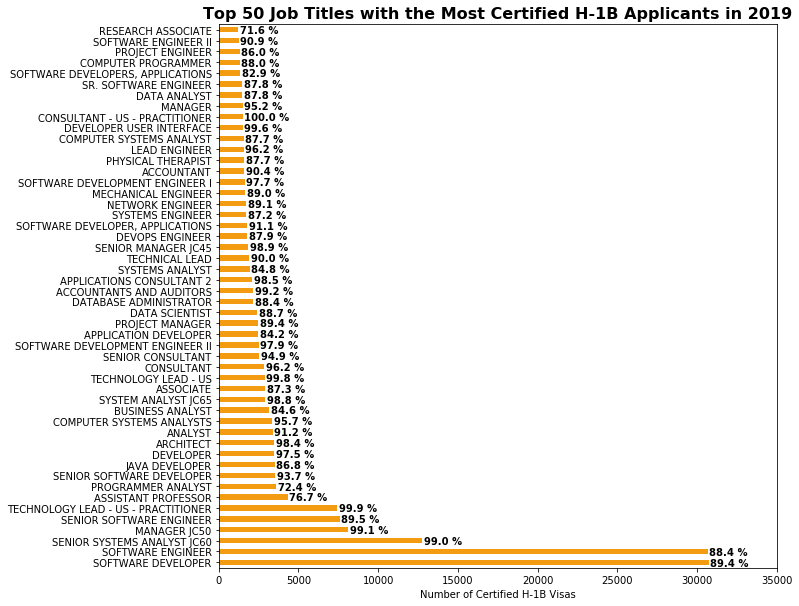

In [17]:
# Explore JOB_TITLE Column
# Deep copy the JOB_TITLE list
JOB_TITLE = deepcopy(list(data["JOB_TITLE"]))

# Loop through the JOB_TITLE column to make sure there is no blank space in the list
for idx in range(0, len(JOB_TITLE)):
    
    # Extract job title information
    job_title = JOB_TITLE[idx]
    
    if type(job_title) == str:
        
        # Update the JOB_TITLE
        JOB_TITLE[idx] = job_title
        
    else:
        
        # if empty, it is Blank
        JOB_TITLE[idx] = "Blank"

# Count how many applicants are there in different job titles
job_title_dict = Counter(JOB_TITLE).most_common(100)[:][:]
print("Number of Applicants for each Job Title:")
print(job_title_dict)
print("\n")


# Create a job title count dictionary that stores approved # and rejected #
# for example, {Engineer: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]
#               Doctor: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]...}
job_title_count_dict = {i: [0, 0, 0, 0.0] for i in set(JOB_TITLE)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for each job title.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the job title and case status 
    jb_title, c_status = JOB_TITLE[idx], CASE_STATUS[idx]
    
    # Incement the count
    job_title_count_dict[jb_title][c_status] += 1
    job_title_count_dict[jb_title][2] += 1
    job_title_count_dict[jb_title][3] = job_title_count_dict[jb_title][1] / job_title_count_dict[jb_title][2] * 100
    
    total_applicants += 1

# Convert to dataframe
df_job_title_count = pd.DataFrame.from_dict(job_title_count_dict, orient='index')
df_job_title_count.columns = ['Number of Denied H-1B Visas', 'Number of Certified H-1B Visas', 'Total H-1B Applicants in the State', 'Certified H-1B Visas Percentage [%]']

# Sorted dataframe from largest to smallest
sorted_df = df_job_title_count['Number of Certified H-1B Visas'].sort_values(ascending=False)
jb_cert_perc = df_job_title_count.loc[sorted_df.index[:]]['Certified H-1B Visas Percentage [%]']

# Plot horizontal bar
plt.figure(figsize=(10,10))
ax1 = df_job_title_count['Number of Certified H-1B Visas'].sort_values(ascending=False).head(50).plot(kind='barh', color='#F39C12')
ax1.set_ylabel("")
ax1.set_title('Top 50 Job Titles with the Most Certified H-1B Applicants in 2019', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 35000])
ax1.set_xlabel("Number of Certified H-1B Visas")

# Annotate the horizontal bar with Certified H-1B Visas Percentage [%]
for i, num_cert in enumerate(sorted_df[:50]):

    ax1.text(num_cert + 100, i - 0.3, f'{jb_cert_perc[i]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

**Data Visualization: Standard Occupational Classification (SOC) Title**

In [18]:
# Explore SOC_TITLE Column
# Deep copy the SOC_TITLE list
SOC_TITLE = deepcopy(list(data["SOC_TITLE"]))

# Loop through the SOC_TITLE column to make sure there is no blank space in the list
for idx in range(0, len(SOC_TITLE)):
    
    # Extract soc title information
    soc_title = SOC_TITLE[idx]
    
    if type(soc_title) == str:
        
        # Update the SOC_TITLE
        SOC_TITLE[idx] = soc_title
        
    else:
        
        # if empty, it is Blank
        SOC_TITLE[idx] = "Blank"
        
# Count how many applicants are there in different soc titles
soc_title_dict = Counter(SOC_TITLE).most_common()[:][:]
print("Number of Applicants for each SOC Title:")
print(soc_title_dict)
print("\n")


# Create a soc title count dictionary that stores approved # and rejected #
# for example, {Engineer: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]
#               Doctor: [Rejected #, Approved#, Total # of Applicant, Percentage of Approved]...}
soc_title_count_dict = {i: [0, 0, 0, 0.0] for i in set(SOC_TITLE)}
        
# Total applicant counts
total_applicants = 0

# Counts the number of approved and number of rejection for each job title.
for idx in range(0, len(CASE_STATUS)):
    
    # Extract the soc title and case status 
    sc_title, c_status = SOC_TITLE[idx], CASE_STATUS[idx]
    
    # Incement the count
    soc_title_count_dict[sc_title][c_status] += 1
    soc_title_count_dict[sc_title][2] += 1
    soc_title_count_dict[sc_title][3] = soc_title_count_dict[sc_title][1] / soc_title_count_dict[sc_title][2] * 100
    
    total_applicants += 1

print(soc_title_count_dict["SOFTWARE DEVELOPERS, APPLICATIONS"])
    
# Convert to dataframe
df_soc_title_count = pd.DataFrame.from_dict(soc_title_count_dict, orient='index')
df_soc_title_count.columns = ['Number of Denied H-1B Visas', 'Number of Certified H-1B Visas', 'Total H-1B Applicants', 'Certified H-1B Visas Percentage [%]']

# Sorted dataframe from largest to smallest
sorted_df = df_soc_title_count['Total H-1B Applicants'].sort_values(ascending=False)
sc_cert_perc = df_soc_title_count.loc[sorted_df.index[:]]['Certified H-1B Visas Percentage [%]']

Number of Applicants for each SOC Title:
[('SOFTWARE DEVELOPERS, APPLICATIONS', 216551), ('COMPUTER OCCUPATIONS, ALL OTHER', 56626), ('COMPUTER SYSTEMS ANALYST', 40870), ('COMPUTER SYSTEMS ANALYSTS', 32096), ('SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE', 31724), ('COMPUTER PROGRAMMERS', 17128), ('OPERATIONS RESEARCH ANALYSTS', 11949), ('MECHANICAL ENGINEERS', 11698), ('ACCOUNTANTS AND AUDITORS', 10990), ('MANAGEMENT ANALYSTS', 10279), ('FINANCIAL ANALYSTS', 9820), ('STATISTICIANS', 9567), ('COMPUTER AND INFORMATION SYSTEMS MANAGERS', 9455), ('DATABASE ADMINISTRATORS', 9114), ('ELECTRICAL ENGINEERS', 8308), ('NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS', 7039), ('MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS', 6569), ('ELECTRONICS ENGINEERS, EXCEPT COMPUTER', 6487), ('MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS', 5672), ('PHYSICIANS AND SURGEONS, ALL OTHER', 5456), ('INDUSTRIAL ENGINEERS', 5403), ('CIVIL ENGINEERS', 4987), ('INFORMATION SECURITY ANALYSTS', 4797), ('COMPUTER AND INFORMATI

[22491, 194060, 216551, 89.61399393214532]


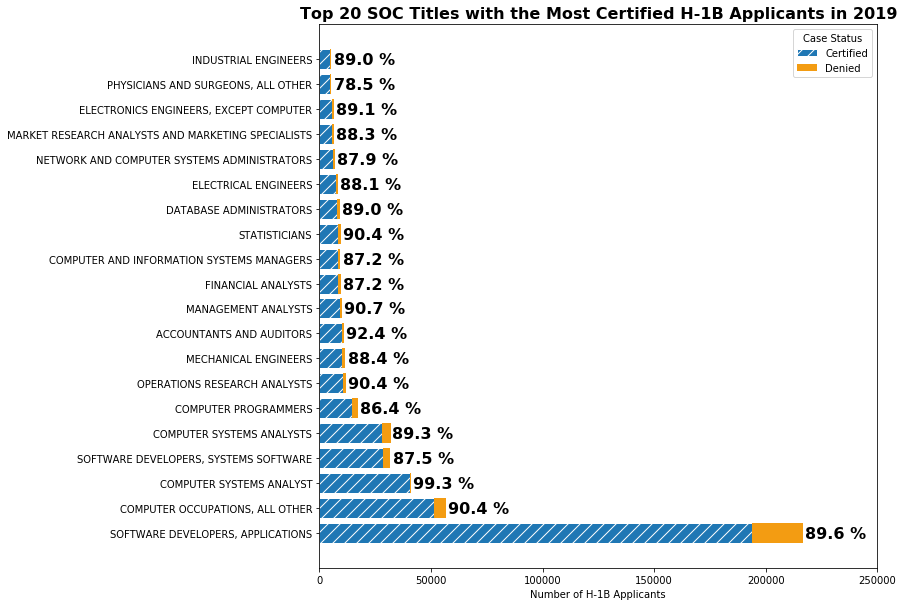

In [19]:
# Plot horizontal bar
plt.figure(figsize=(10,10))
certified_data = df_soc_title_count['Number of Certified H-1B Visas'].sort_values(ascending=False).head(20)
denied_data = df_soc_title_count.loc[certified_data.index[:]]['Number of Denied H-1B Visas']
b1 = plt.barh(certified_data.index, certified_data, color='#1f77b4', hatch ="//", edgecolor="white")
b2 = plt.barh(certified_data.index, denied_data, left=certified_data, color='#F39C12')
plt.ylabel("")
plt.xlim([0, 250000])
plt.xlabel("Number of H-1B Applicants")
plt.title('Top 20 SOC Titles with the Most Certified H-1B Applicants in 2019', fontweight='bold', fontsize = 16)
plt.legend([b1, b2], ["Certified", "Denied"], title="Case Status", loc="upper right")

# Annotate the horizontal bar with Certified H-1B Visas Percentage [%]
for i, num_cert in enumerate(sorted_df[:20]):

    plt.text(num_cert + 1000, i- 0.2, f'{sc_cert_perc[i]:0.1f} %', color='black', fontweight='bold', fontsize = 16)
    
plt.show()

In [27]:
# Create labelencoder object
labelencoder = LabelEncoder()

# Case Status Label Encoder
case_status = deepcopy(CASE_STATUS)
# Label-encode the case status (string to integer)
case_status = labelencoder.fit_transform(case_status)

# Visa Class Label Encoder
visa_class = deepcopy(VISA_CLASS)
# Label-encode the visa class (string to integer)
visa_class = labelencoder.fit_transform(visa_class)

# Worksite State Label Encoder
worksite_state_1 = deepcopy(WORKSITE_STATE_1)
# Label-encode the worksite state (string to integer)
worksite_state_1 = labelencoder.fit_transform(worksite_state_1)

# Employer Name Label Encoder
employer_name = deepcopy(EMPLOYER_NAME)
# Label-encode the employer name (string to integer)
employer_name = labelencoder.fit_transform(employer_name)

# Full Time Position Label Encoder
full_time_position = deepcopy(FULL_TIME_POSITION)
# Label-encode the full time position (string to integer)
full_time_position = labelencoder.fit_transform(full_time_position)

# Prevailing Wage Level Label Encoder
pw_wage_level_1 = deepcopy(PW_WAGE_LEVEL_1)
# Label-encode the Prevailing Wage Level (string to integer)
pw_wage_level_1 = labelencoder.fit_transform(pw_wage_level_1)

# Advanced Degree Label Encoder
statutory_basis = deepcopy(STATUTORY_BASIS)
# Label-encode the statutory basis (string to integer)
statutory_basis = labelencoder.fit_transform(statutory_basis)

# SOC Title Label Encoder
soc_title = deepcopy(SOC_TITLE)
# Label-encode the soc title (string to integer)
soc_title = labelencoder.fit_transform(soc_title)

# Create a dataframe for correlation
data_frame_H1B = pd.DataFrame(list(zip(case_status, visa_class, worksite_state_1, employer_name, full_time_position, pw_wage_level_1, statutory_basis, soc_title)),
                              columns = ['CASE_STATUS', 'VISA_CLASS', 'WORKSITE_STATE_1', 'EMPLOYER_NAME', 'FULL_TIME_POSITION', 'PW_WAGE_LEVEL_1', 'STATUTORY_BASIS','SOC_TITLE'])


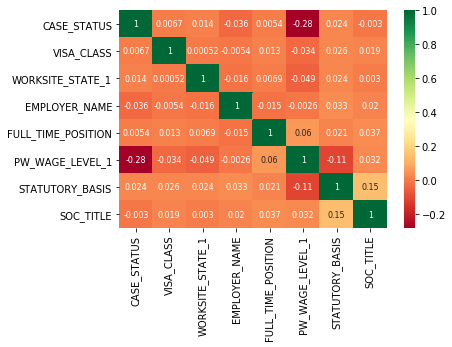

In [34]:
# Correlation between major categories
sns.heatmap(data_frame_H1B.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":8})
plt.show()